Assignment 5

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

#1
blackRock_Temp= np.genfromtxt('/data9/UN3400/data/brf_temp.txt', delimiter='\t')

In [2]:
#2-3

#data
N, i = np.shape(blackRock_Temp) 
t = blackRock_Temp[:, 0:1] 
d_obs = blackRock_Temp[:, 1:2] 
P = 365.25

# model
G = np.column_stack([
    np.cos(2 * np.pi * t / P),  
    np.sin(2 * np.pi * t / P),         
    np.ones_like(t)             
])

#np least squares
params = np.linalg.lstsq(G, d_obs, rcond=None)[0]
A, B, C = params

# model parameters
print(f'Fitted parameters: A = {A}, B = {B}, C = {C}')

Fitted parameters: A = [-11.58329959], B = [-4.27083943], C = [9.04146981]


In [3]:
#Verify with SCIPY

from scipy import optimize

def model(t, A, B, C):
    return A * np.cos(2 * np.pi * t / P) + B * np.sin(2 * np.pi * t / P) + C

params = optimize.curve_fit(model, xdata = blackRock_Temp[:, 0], ydata=blackRock_Temp[:, 1])[0]
A, B, C = params

# model parameters
print(f'Fitted parameters: A = {A}, B = {B}, C = {C}')

Fitted parameters: A = -11.583299586823854, B = -4.270839425694185, C = 9.041469810935801


In [4]:
#4
# amplitude of function
D = math.sqrt(A**2 + B**2)

print(f'Amplitude: D = {D}')

Amplitude: D = 12.345561903703594


In [5]:
#5
phi = np.arctan2(B, A)  
t_max = (phi * P) / (2 * np.pi)

print(f't_max value: {t_max}')
print(f'Seasonal Peak Day: {360+t_max}')

t_max value: -162.09057876932852
Seasonal Peak Day: 197.90942123067148


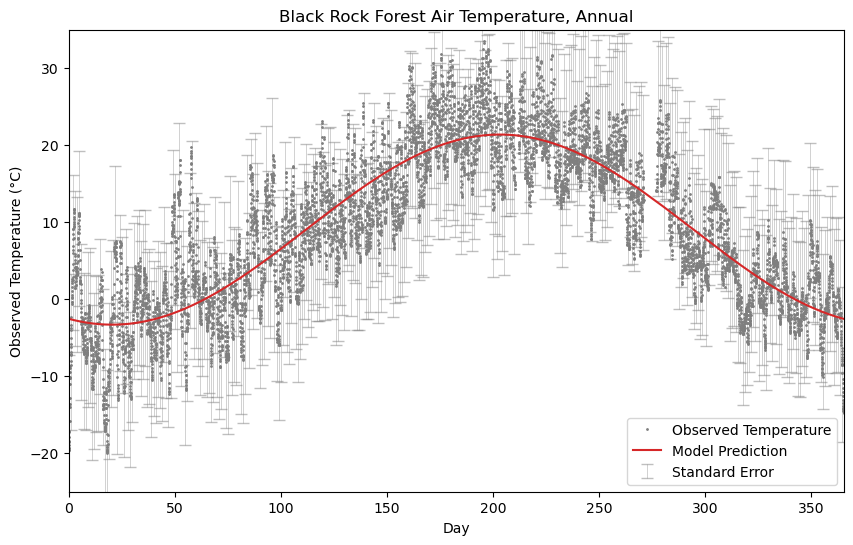

In [14]:
#6
# model
d_pre = model(t, A, B, C)

#standard error
d_err = (np.std(d_obs) * np.ones_like(d_obs))
d_err_1d = d_err.reshape(-1)
d_obs_1d = d_obs.reshape(-1)

#plot
plt.figure(figsize=(10, 6))
plt.axis([np.min(t), np.max(t), -25, 35])
plt.plot(t, d_obs, 'o', color="tab:grey", label='Observed Temperature', markersize=1, zorder=1)
plt.plot(t, d_pre, '-', color="tab:red", label='Model Prediction', zorder=2)
plt.errorbar(t, d_obs_1d, yerr=d_err_1d, label='Standard Error', color="tab:orange", alpha=0.5, ecolor='gray', linewidth=0, elinewidth=0.5, errorevery=24, capsize=4, fillstyle='full', zorder=0)

plt.title('Black Rock Forest Air Temperature, Annual')
plt.xlabel('Day')
plt.ylabel('Observed Temperature (°C)')
plt.legend()
